# Respondendo Perguntas do CEO - Exercício 03

### Importando Bibliotecas Necessárias

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Carregando Dataset

In [2]:
df = pd.read_csv('datasets/kc_house_data.csv')

#### Visualizando Dataset

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### Respondendo as perguntas

#### 1. Crie uma nova coluna chamada: "dormitory_type"

- Se o valor da coluna "bedrooms" for igual à 1 => 'studio'
- Se o valor da coluna "bedrooms" for igual à 2 => 'apartament' 
- Se o valor da coluna "bedrooms" for maior que 2 => 'house'  

In [4]:
df['dormitory_type'] = df['bedrooms'].apply(lambda x: 'studio' if x == 1
                                                        else 'apartament' if x == 2
                                                        else "house" if x > 2 
                                                        else 'NA')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,house
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,house
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,apartament
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,house
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,house


#### 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos

In [6]:
from matplotlib import pyplot as plt

In [7]:
# soma
df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

,bedrooms,price
0,0,5323550.00
1,1,63210934.00
2,2,1107788602.00
3,3,4580263939.00
4,4,4372957028.00
5,5,1259346326.00
6,6,224541613.00
7,7,36145017.00
8,8,14366000.00
9,9,5363999.00


<BarContainer object of 13 artists>

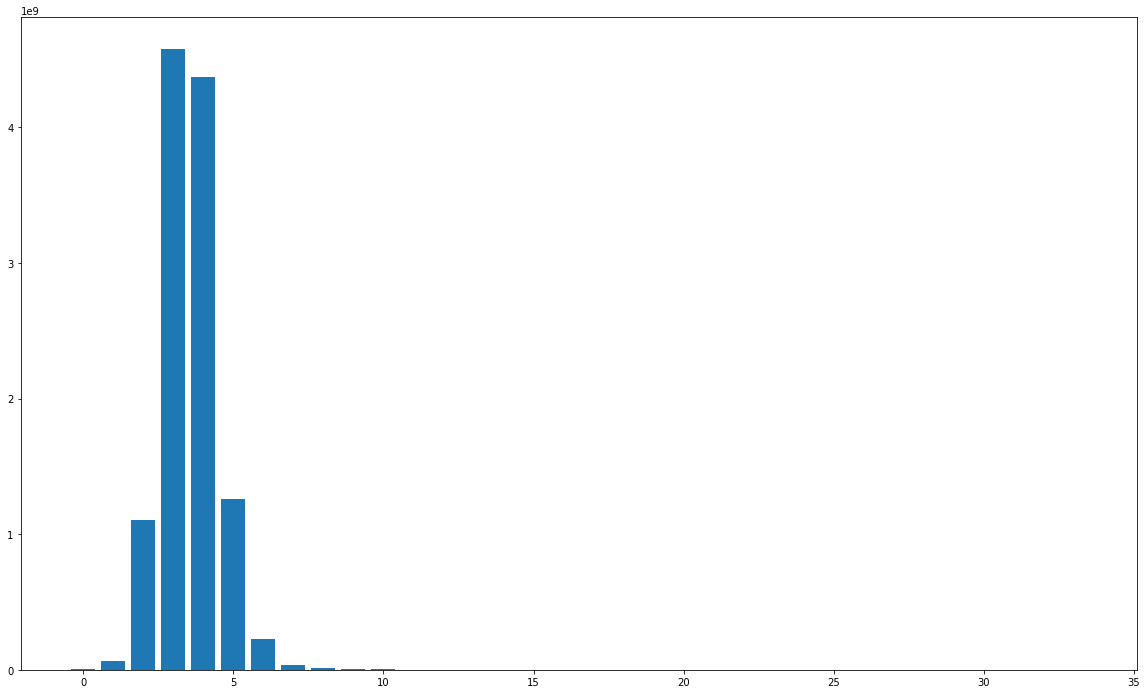

In [8]:
by_bedrooms = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
plt.figure(figsize=(20, 12))
plt.bar(by_bedrooms['bedrooms'], by_bedrooms['price'])

#### 3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis

In [9]:
df['yr_built'].dtypes

dtype('int64')

In [10]:
df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

,yr_built,price
0,1900,581387.21
1,1901,556935.93
2,1902,673007.41
3,1903,480958.20
4,1904,583756.64
...,...,...
111,2011,544522.00
112,2012,527447.34
113,2013,678545.45
114,2014,683681.75


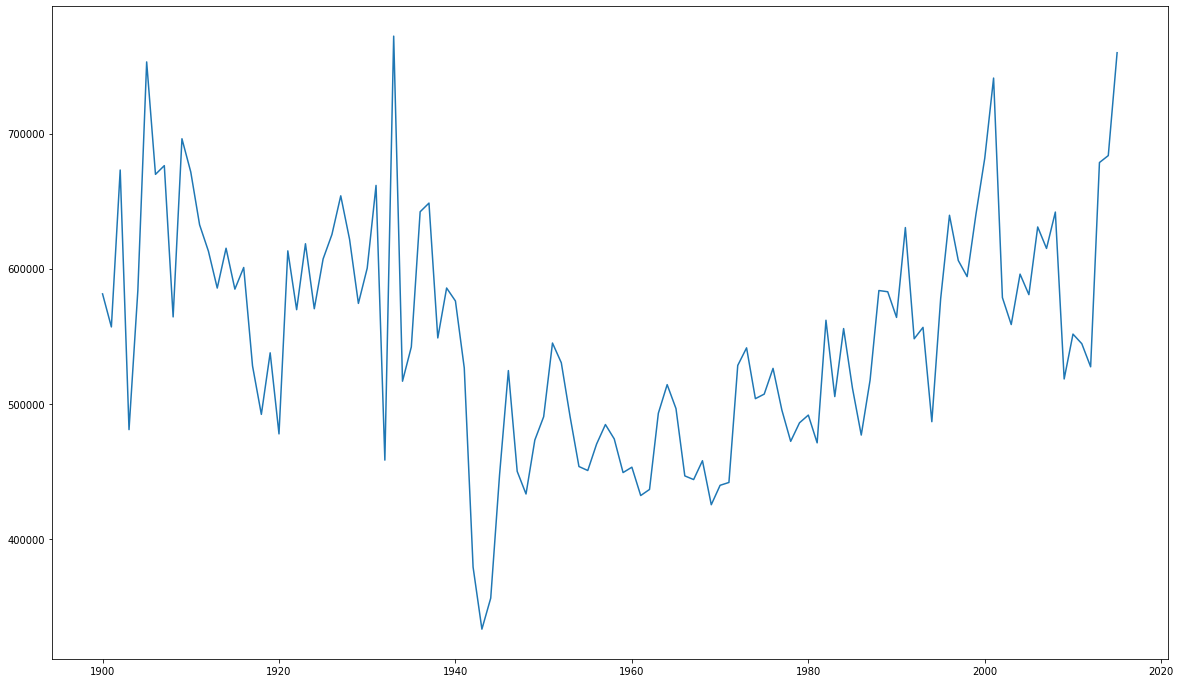

In [11]:
by_yr_built = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

plt.figure(figsize=(20, 12))
plt.plot(by_yr_built['yr_built'], by_yr_built['price'])

#### 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios

In [12]:
df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

,dormitory_type,price
0,NA,409503.85
1,apartament,401372.68
2,house,563092.21
3,studio,317642.88


<BarContainer object of 4 artists>

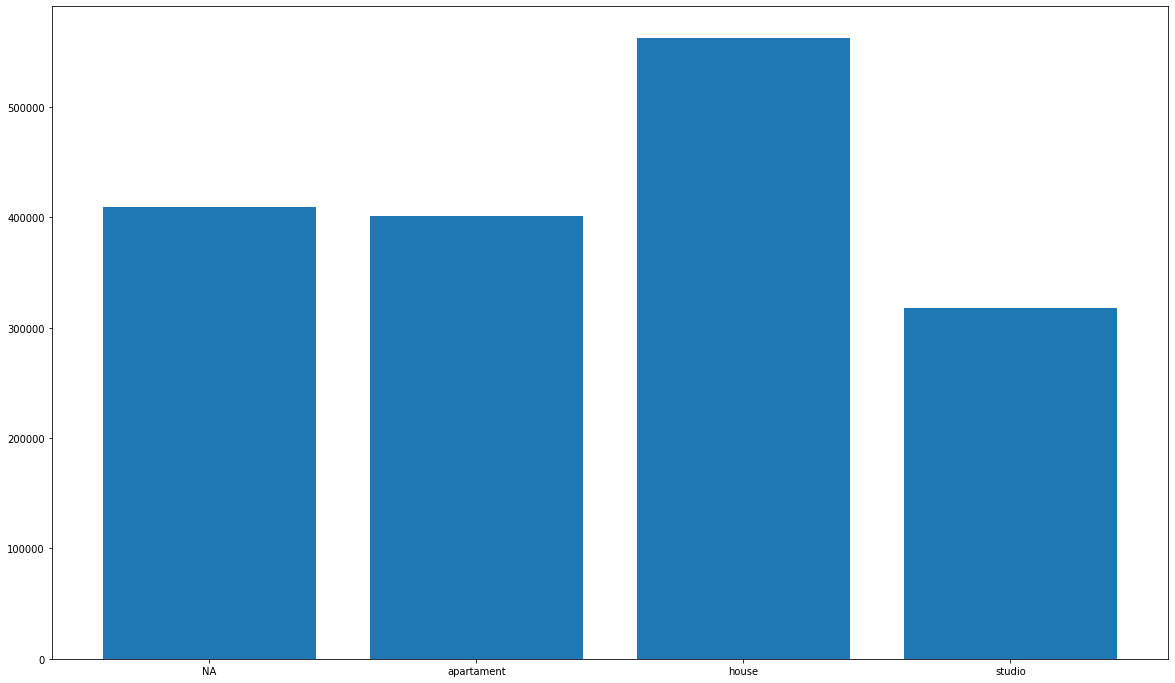

In [13]:
by_dormitory_type = df[['price', 'dormitory_type']].groupby('dormitory_type')\
                                                    .mean().reset_index()

plt.figure(figsize=(20, 12))
plt.bar(by_dormitory_type['dormitory_type'], by_dormitory_type['price'])

#### 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930

In [14]:
df['yr_renovated'].dtypes

dtype('int64')

In [15]:
df.loc[df['yr_renovated'] >= 1930, ['price', 'yr_renovated']]\
                               .groupby('yr_renovated').mean().reset_index()

,yr_renovated,price
0,1934,459950.00
1,1940,378400.00
2,1944,521000.00
3,1945,398666.67
4,1946,351137.50
...,...,...
64,2011,607496.15
65,2012,625181.82
66,2013,664663.51
67,2014,654756.25


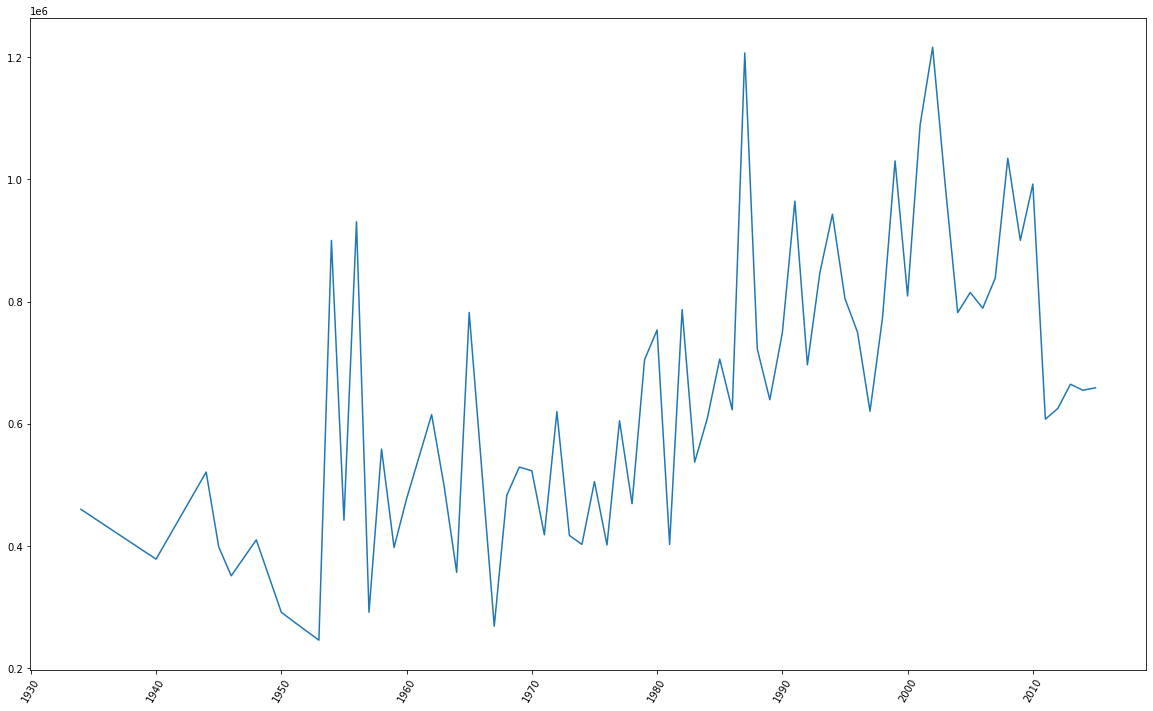

In [16]:
by_yr_renovated_30 = df.loc[df['yr_renovated'] >= 1930, ['price', 'yr_renovated']]\
                               .groupby('yr_renovated').mean().reset_index()

plt.figure(figsize=(20, 12))
plt.plot(by_yr_renovated_30['yr_renovated'], by_yr_renovated_30['price'])
plt.xticks(rotation=60);

#### 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis

In [17]:
df[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean()

price
yr_built dormitory_type          
1900     apartament     589533.33
         house          584854.27
         studio         398944.00
1901     apartament     452856.40
         house          578619.17
...                           ...
2014     house          692687.72
         studio         516500.00
2015     apartament     543250.00
         house          797383.06
         studio         385195.00

[314 rows x 1 columns]

#### 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 (Dashboard: 1 linha e 2 colunas)

<BarContainer object of 4 artists>

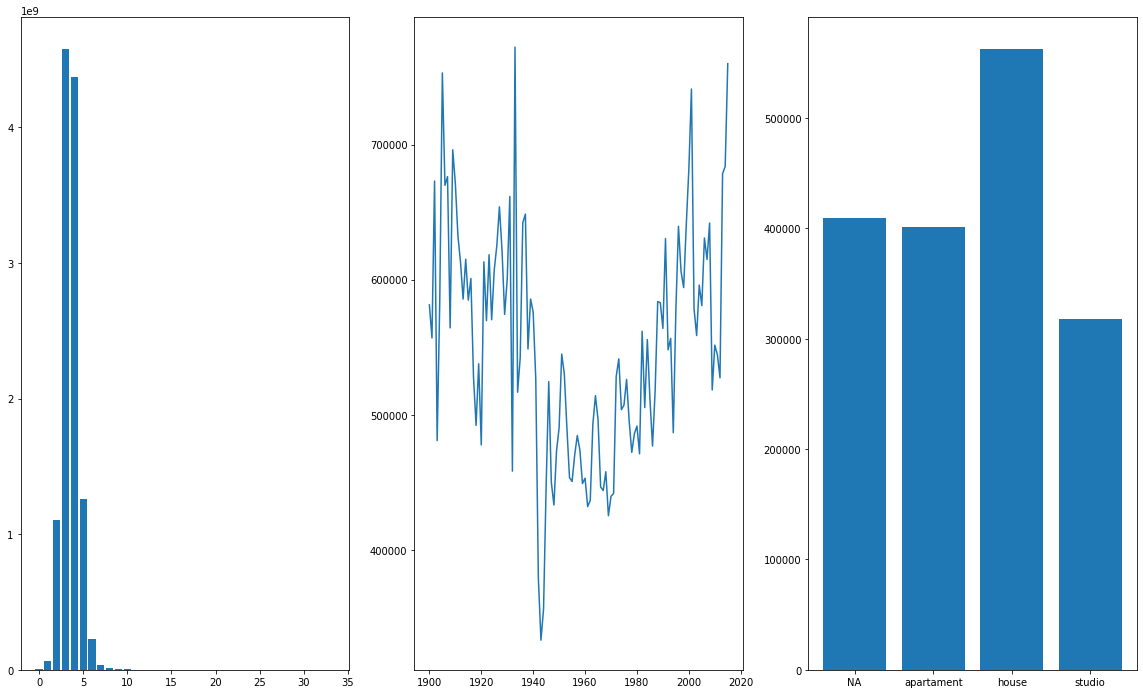

In [18]:
# Dashboard
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[0,1])
ax3 = fig.add_subplot(specs[0,2])

# First graph
by_bedrooms = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(by_bedrooms['bedrooms'], by_bedrooms['price'])

# Second graph
by_yr_built = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax2.plot(by_yr_built['yr_built'], by_yr_built['price'])

# Third graph
by_dormitory_type = df[['price', 'dormitory_type']].groupby('dormitory_type')\
                                                    .mean().reset_index()

ax3.bar(by_dormitory_type['dormitory_type'], by_dormitory_type['price'])

#### 8. Crie um Dashboard com os gráficos das questões 02, 04 (Dashboard: 2 colunas)

<BarContainer object of 4 artists>

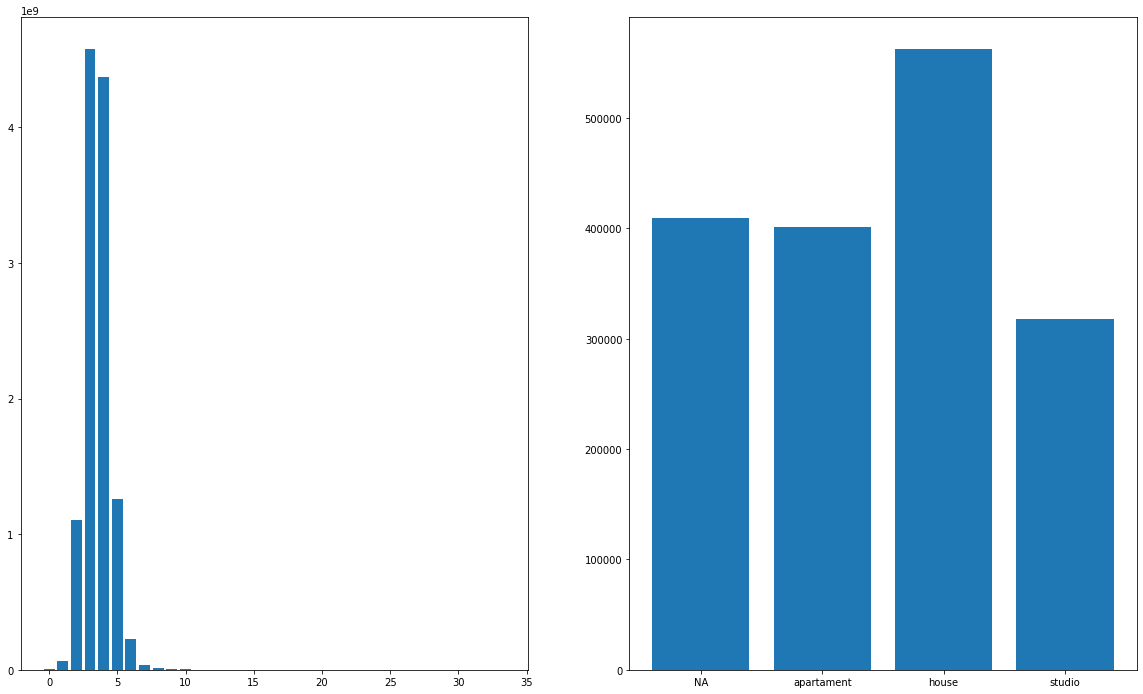

In [19]:
fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[0,1])

# First graph
by_bedrooms = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(by_bedrooms['bedrooms'], by_bedrooms['price'])

# Second graph
by_dormitory_type = df[['price', 'dormitory_type']].groupby('dormitory_type')\
                                                    .mean().reset_index()

ax2.bar(by_dormitory_type['dormitory_type'], by_dormitory_type['price'])

#### 9. Crie um Dashboard com os gráficos das questões 03, 05 (Dashboard: 2 linhas)

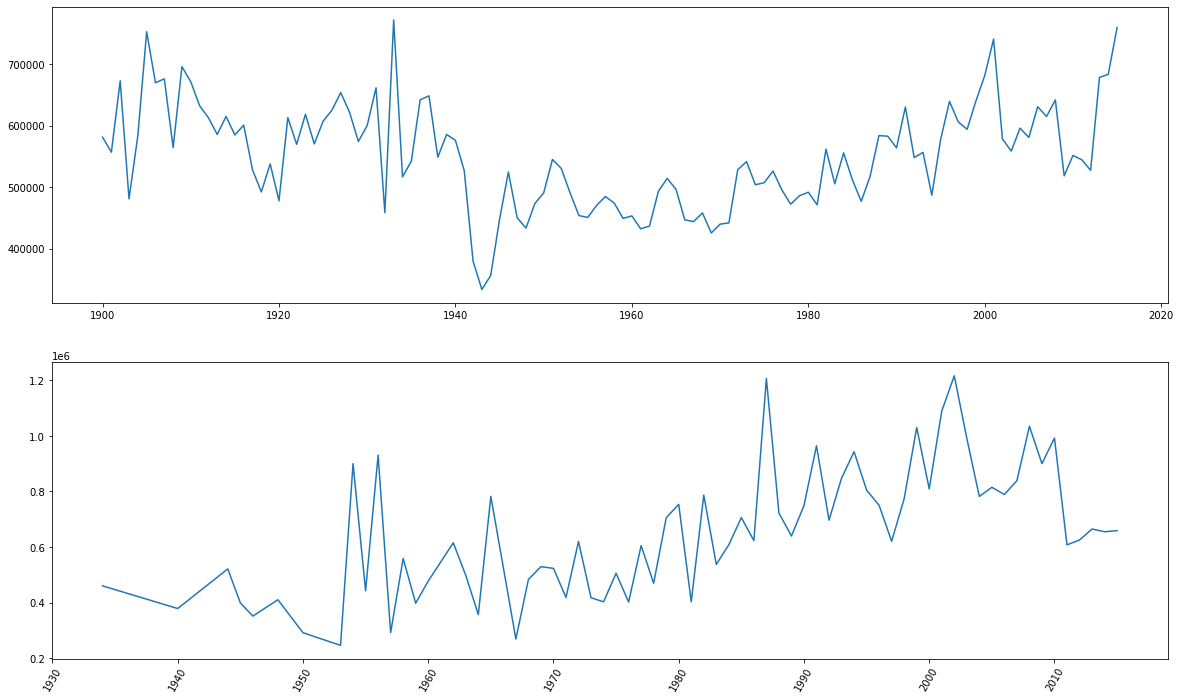

In [20]:
# Dashboard
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0,:])
ax2 = fig.add_subplot(specs[1,:])

# First graph
by_yr_built = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(by_yr_built['yr_built'], by_yr_built['price'])

# Second graph
by_yr_renovated_30 = df.loc[df['yr_renovated'] >= 1930, ['price', 'yr_renovated']]\
                               .groupby('yr_renovated').mean().reset_index()

ax2.plot(by_yr_renovated_30['yr_renovated'], by_yr_renovated_30['price'])
plt.xticks(rotation=60);

#### 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'dormitory_type'],
      dtype='object')

In [22]:
import plotly.express as px

houses = df[['id', 'lat', 'long', 'sqft_living']]

fig = px.scatter_mapbox(houses, lat='lat', lon='long', size='sqft_living',
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, zoom=10)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()                    